# Analysis of Buffalo 311 Service Call

### Sections
- [Require Data from OpenData Buffalo and Save to Local](#require_data_from_opendata_buffalo_and_save_to_local)
- [Acquire Data from Local, Cleaning and PDA](#acquire_data_from_local_cleaning_and_PDA)
- [Histogram for Hourly and Monthly Frenquency of Type Selected](#histogram_for_hourly_and_monthly_frenquency_of_type_selected)
- [Combine Multiple Datasets](#combin_multiple_datasets)
- [Histogram of Service Request under Differert Level of Employment Rate](#histogram_of_service_request_under_different_level_of_employment_rate)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Require Data from OpenData Buffalo and Save to Local
<a id='require_data_from_opendata_buffalo_and_save_to_local'></a>

In [2]:
#check status
url = "https://data.buffalony.gov/resource/whkc-e5vr.json"
response = requests.get(url)
response.raise_for_status()
response


<Response [200]>

In [3]:
# Print headers.
data = response.json()
df = pd.DataFrame(data)
header_list = list(df.columns)
print(header_list)


['case_reference', 'open_date', 'closed_date', 'status', 'subject', 'reason', 'type', 'object_type', 'address_number', 'address_line_1', 'city', 'state', 'zip_code', 'property_id', 'location', 'latitude', 'longitude', 'council_district', 'police_district', 'census_tract', 'census_block_group', 'census_block', 'neighborhood', 'x_coordinate', 'y_coordinate', 'census_tract_2010', 'census_block_group_2010', 'census_block_2010', 'tractce20', 'geoid20_tract', 'geoid20_blockgroup', 'geoid20_block', ':@computed_region_fk4y_hpmh', ':@computed_region_kwzn_pe6v', ':@computed_region_uh5x_q5mi', ':@computed_region_dwzh_dtk5', ':@computed_region_tmcg_v66k', ':@computed_region_xbxg_7ifr', ':@computed_region_eziv_p4ck', ':@computed_region_jdfw_hhbp', ':@computed_region_urdz_b6n8', ':@computed_region_vsen_jbmg', ':@computed_region_nmyf_6jtp', ':@computed_region_ff6v_jbaa', ':@computed_region_gkva_sjqs', ':@computed_region_h7a8_iwt4', 'address_line_2', ':@computed_region_k9un_h6vm']


In [5]:
df.head()

case_reference                open_date              closed_date  \
0  509589-1001799765  2023-02-12T12:00:00.000  2023-02-25T10:39:00.000   
1  508695-1001788285  2023-02-05T20:15:00.000  2023-02-15T08:38:00.000   
2         1001774631  2023-01-17T09:27:00.000  2023-01-18T15:20:00.000   
3         1001764214  2023-01-12T14:40:00.000  2023-01-13T09:53:00.000   
4         1001786969  2023-01-27T13:57:00.000  2023-01-30T22:05:00.000   

   status               subject                        reason  \
0  Closed                  DPIS                       Housing   
1  Closed             Utilities                 National Grid   
2  Closed  Dept of Public Works  Engineering - Street Repairs   
3  Closed       Dept of Parking             Moving Violations   
4  Closed  Dept of Public Works                      Forestry   

                                    type object_type address_number  \
0                        Open311 Housing    Property             86   
1                Streetlights (Req_Serv)    Property             16   
2                    Pot Hole (Req_Serv)    Property   INTERSECTION   
3  Buffalo Traffic Violations (Req_Serv)    Property             65   
4    Fallen Tree Blocking RoW (Req_Serv)    Property            185   

  address_line_1  ... :@computed_region_eziv_p4ck :@computed_region_jdfw_hhbp  \
0         AUSTIN  ...                          72                          18   
1        LOMBARD  ...                          34                           8   
2        Best St  ...                           4                          17   
3     NIAGARA SQ  ...                          77                          19   
4        BURGARD  ...                          15                          17   

  :@computed_region_urdz_b6n8 :@computed_region_vsen_jbmg  \
0                           1                           2   
1                          10                           1   
2                          10                           1   
3                           9                           5   
4                           8                           1   

  :@computed_region_nmyf_6jtp :@computed_region_ff6v_jbaa  \
0                          26                          88   
1                          35                          75   
2                          29                          24   
3                          16                          80   
4                          24                          28   

  :@computed_region_gkva_sjqs :@computed_region_h7a8_iwt4 address_line_2  \
0                         277                          10            NaN   
1                         245                           2            NaN   
2                          29                           2   Fillmore Ave   
3                         265                           4            NaN   
4                         209                           5            NaN   

  :@computed_region_k9un_h6vm  
0                         NaN  
1                         NaN  
2                         NaN  
3                           9  
4                         NaN  

[5 rows x 48 columns]

In [6]:
#write dataframe to csv
df.to_csv("data/311_service_call.csv",index=False)

# Acquire Data from Local, Cleaning and PDA
<a id='acquire_data_from_local_cleaning_and_PDA'></a>

In [4]:
#read in data from saved csv
data = pd.read_csv("data/311_service_call.csv")
df = pd.DataFrame(data)
df.head()

case_reference                open_date              closed_date  \
0  509589-1001799765  2023-02-12T12:00:00.000  2023-02-25T10:39:00.000   
1  508695-1001788285  2023-02-05T20:15:00.000  2023-02-15T08:38:00.000   
2         1001774631  2023-01-17T09:27:00.000  2023-01-18T15:20:00.000   
3         1001764214  2023-01-12T14:40:00.000  2023-01-13T09:53:00.000   
4         1001786969  2023-01-27T13:57:00.000  2023-01-30T22:05:00.000   

   status               subject                        reason  \
0  Closed                  DPIS                       Housing   
1  Closed             Utilities                 National Grid   
2  Closed  Dept of Public Works  Engineering - Street Repairs   
3  Closed       Dept of Parking             Moving Violations   
4  Closed  Dept of Public Works                      Forestry   

                                    type object_type address_number  \
0                        Open311 Housing    Property             86   
1                Streetlights (Req_Serv)    Property             16   
2                    Pot Hole (Req_Serv)    Property   INTERSECTION   
3  Buffalo Traffic Violations (Req_Serv)    Property             65   
4    Fallen Tree Blocking RoW (Req_Serv)    Property            185   

  address_line_1  ... :@computed_region_eziv_p4ck :@computed_region_jdfw_hhbp  \
0         AUSTIN  ...                        72.0                        18.0   
1        LOMBARD  ...                        34.0                         8.0   
2        Best St  ...                         4.0                        17.0   
3     NIAGARA SQ  ...                        77.0                        19.0   
4        BURGARD  ...                        15.0                        17.0   

  :@computed_region_urdz_b6n8 :@computed_region_vsen_jbmg  \
0                         1.0                         2.0   
1                        10.0                         1.0   
2                        10.0                         1.0   
3                         9.0                         5.0   
4                         8.0                         1.0   

  :@computed_region_nmyf_6jtp  :@computed_region_ff6v_jbaa  \
0                        26.0                         88.0   
1                        35.0                         75.0   
2                        29.0                         24.0   
3                        16.0                         80.0   
4                        24.0                         28.0   

   :@computed_region_gkva_sjqs :@computed_region_h7a8_iwt4 address_line_2  \
0                        277.0                        10.0            NaN   
1                        245.0                         2.0            NaN   
2                         29.0                         2.0   Fillmore Ave   
3                        265.0                         4.0            NaN   
4                        209.0                         5.0            NaN   

  :@computed_region_k9un_h6vm  
0                         NaN  
1                         NaN  
2                         NaN  
3                         9.0  
4                         NaN  

[5 rows x 48 columns]

In [5]:
# Drop rows with missing values
df.dropna(subset=['open_date','type'], inplace=True)

In [29]:
#Count for different types
df.groupby(["reason", "type"]).count()["open_date"]

reason                              type                                
Adjudication - Ordinance Violation  Illegal Dumping (Req_Serv)               1
Administration                      Fair Housing Issue (Req_Serv)            3
Animal Shelter                      Animals (Req_Serv)                      33
                                    Dead Animal Removal (Req_Serv)           7
BFD                                 Fire (Req_Serv)                          1
                                                                            ..
Streets                             Street Salting (Req_Serv)               45
                                    Street Snow Plowing (Req_Serv)          88
                                    Street Snow Plowing Issue (Req_Serv)    20
Streets/Sanitation                  Damage from Street Worker (Req_Serv)     6
Taxation                            Taxation Issue (Req_Serv)                1
Name: open_date, Length: 90, dtype: int64

In [6]:
# The request type is n
n=5

In [9]:
# Print(type_column)
unique_types = df['type'].unique()
type_req=unique_types[n]
#print(unique_types)
#print(type_req)

In [10]:
print(unique_types)


['Open311 Housing' 'Streetlights (Req_Serv)' 'Pot Hole (Req_Serv)'
 'Buffalo Traffic Violations (Req_Serv)'
 'Fallen Tree Blocking RoW (Req_Serv)' 'Rodents (Req_Serv)'
 'Housing Violations (Req_Serv)' 'Street Salting (Req_Serv)'
 'Recycling Tote Replace (Req_Serv)' 'Street Snow Plowing (Req_Serv)'
 'Totes Deliver (Req_Serv)' 'Garbage Missed Pick Up (Req_Serv)'
 'Totes Replace (Req_Serv)' 'Leaves / Lawn Debris (Req_Serv)'
 'Parking Issues (Req_Serv)' 'Sign Maintenance (Req_Serv)'
 'FOIL Records EDPIS (Req_Serv)'
 'Missed Pickup 2_Piece Large Trash (Req_Serv)' 'Tree Other (Req_Serv)'
 'Police Issue (Req_Serv)' 'Water Tested (Req_Serv)'
 'PVB Single Meter (Req_Serv)' 'Basement Flooding (Req_Serv)'
 'Trash Ordinance Violation (Req_Serv)' 'BMHA Issue (Req_Serv)'
 'Pest (Req_Serv)' 'Dead Animal Removal (Req_Serv)' 'Sewer (Req_Serv)'
 'Cave In (Req_Serv)' 'Quality of Life Issue (Req_Serv)'
 'Fire Hydrant Issue (Req_Serv)' 'Street Snow Plowing Issue (Req_Serv)'
 'Illegal Dumping Street (Req_Se

In [11]:
print(type_req)

Rodents (Req_Serv)


In [12]:
# Filter the data to only include requested data
type_req_df = df[df["type"] == type_req]

In [13]:
# Convert the "open_date" column to a datetime data type
type_req_df["open_date"] = pd.to_datetime(type_req_df["open_date"])

<ipython-input-13-edacfdc32df9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_req_df["open_date"] = pd.to_datetime(type_req_df["open_date"])


In [14]:
# Create a new column for the hour of the day
type_req_df["hour"] = type_req_df["open_date"].dt.hour

<ipython-input-14-c28d2bcf3015>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_req_df["hour"] = type_req_df["open_date"].dt.hour


In [15]:
# Create a new column for the month of the year
type_req_df["month"] = type_req_df["open_date"].dt.month

<ipython-input-15-263bd8ba4f89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_req_df["month"] = type_req_df["open_date"].dt.month


# Histogram for Hourly and Monthly Frenquency of Type Selected
<a id='histogram_for_hourly_and_monthly_frenquency_of_type_selected'></a>

In [16]:
# Create two subplots, one for the hourly frequency and one for the monthly frequency
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

Text(0.5, 1.0, 'Hourly Frequency of Rodents (Req_Serv)')

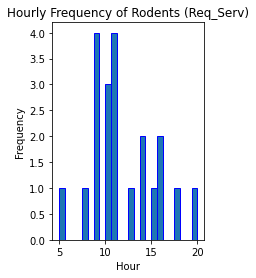

In [17]:
# Create a histogram of the hourly frequency of type_req
plt.subplot(1, 2, 1)
plt.hist(type_req_df['hour'], bins=24, edgecolor='blue')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Hourly Frequency of ' + type_req)

Text(0.5, 1.0, 'Monthly Frequency of Rodents (Req_Serv)')

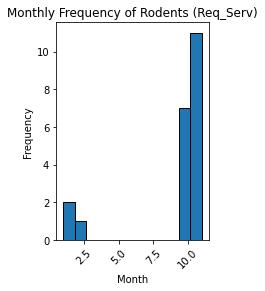

In [18]:
# Create a histogram of the monthly frequency of type_req
plt.subplot(1, 2, 2)
plt.hist(type_req_df['month'], bins=12, edgecolor='black')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Monthly Frequency of ' + type_req)

In [19]:
# Show the figure
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

The request for Rodents has a peak in September to November within morning hours

# Combine Multiple Datasets
<a id='combin_multiple_datasets'></a>

In [20]:
ur2 = "https://data.buffalony.gov/resource/adai-75jt.json"
response2 = requests.get(ur2)
data2 = response2.json()
df2 = pd.DataFrame(data2)
header_list2 = list(df2.columns)
#print(header_list2)

In [21]:
# Line the two tables and perform a statistical analysis
url = "https://data.buffalony.gov/resource/whkc-e5vr.json"
ur2 = "https://data.buffalony.gov/resource/adai-75jt.json"

In [22]:
# Read in the data from the URLs
df1 = pd.read_json(url)
df2 = pd.read_json(ur2)

In [23]:
# Merge the two dataframes on the "neighborhood" column
merged_df = pd.merge(df1, df2[['neighborhood', 'employment_rate']], on='neighborhood')

# Histogram of Service Request under Differert Level of Employment Rate
<a id='histogram_of_service_request_under_different_level_of_employment_rate'></a>

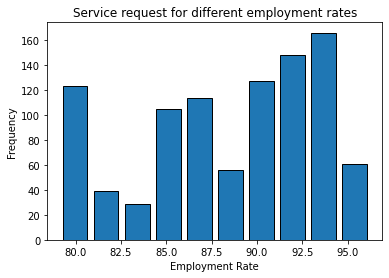

In [24]:
# Create a histogram of the employment rates
plt.hist(merged_df['employment_rate'], bins=10, rwidth=0.8, edgecolor='black')
plt.xlabel('Employment Rate')
plt.ylabel('Frequency')
plt.title('Service request for different employment rates')
plt.show()

In genernal, number of service requests in crease while employment rate grows